# Data sets

Working with the dataset 'Iris'

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
# Load in the data set iris
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
# Let's see how many examples we have of each species as well as the data type
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Text(0.5, 1.0, 'Iris Species Count')

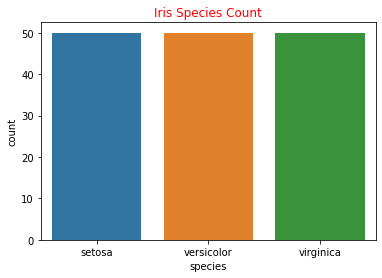

In [7]:
# Bar plot with seaborn
sns.countplot(x = 'species', data = df).set_title('Iris Species Count', color = 'r') 

Text(0.5, 1.0, 'Area plot for Iris')

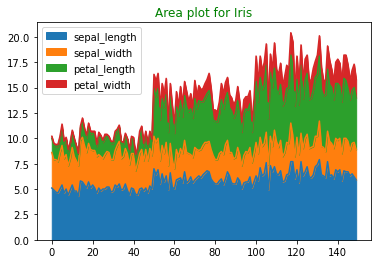

In [8]:
# Area plot for each variable
df.plot.area().set_title('Area plot for Iris', color = 'g')

Text(0.5, 1.0, 'Area plot for Iris')

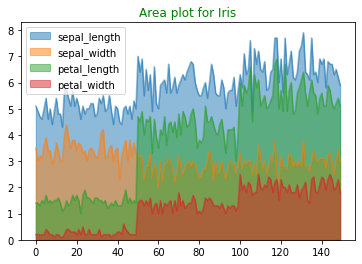

In [9]:
# Let's plot the unstacked chart of the variable
df.plot.area(stacked = False).set_title('Area plot for Iris', color = 'g')

In [10]:
# Choose column and show average for each species
iris_avg = df['petal_width'].groupby(df['species']).mean() 
iris_avg

species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64

Text(0.5, 1.0, 'Petal Width for Iris')

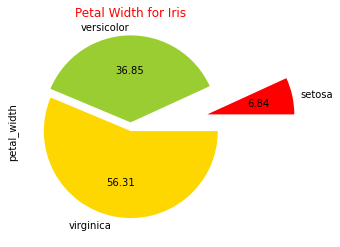

In [11]:
colors = ['red','yellowgreen','gold']
# sns.set_palette('colorblind') # Set the pastel palette
ax = iris_avg.plot.pie(autopct = '%.2f', explode = [0.9,0.1,0],colors = colors)
ax.set_title('Petal Width for Iris', color = 'r')

Text(0.5, 1.0, 'Iris Density chart')

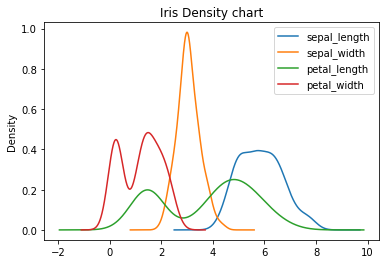

In [12]:
# Density Chart
df.plot.kde().set_title('Iris Density chart')

# 2 variables - 3 variables - 4 variables

Text(0.5, 0, 'Sepal Length')

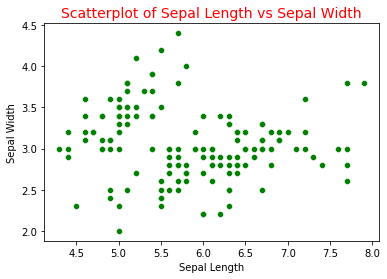

In [13]:
# 2 variables with seaborn
# sns.set_style ('whitegrid')
ax = sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df, color = 'g')
ax.set_title('Scatterplot of Sepal Length vs Sepal Width', size = 14, color = 'r')
# Do the same graph but with titles
ax.set_ylabel('Sepal Width')
ax.set_xlabel('Sepal Length')

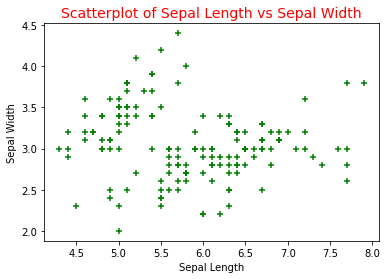

In [14]:
# Using Matplotlib 2 variables
plt.scatter('sepal_length','sepal_width', data = df, marker = '+', color = 'g')
plt.title('Scatterplot of Sepal Length vs Sepal Width', size = 14, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Text(0.5, 0, 'Sepal Length')

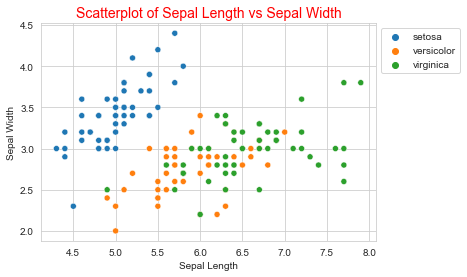

In [15]:
# 3 variables with Seaborn
sns.set_style('whitegrid') #-> inserts a grid in the plot
ax = sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df, hue = 'species')
ax.set_title('Scatterplot of Sepal Length vs Sepal Width', size = 14, color = 'r')
ax.legend(loc = 'upper left', bbox_to_anchor = (1,1))
ax.set_ylabel('Sepal Width')
ax.set_xlabel('Sepal Length')

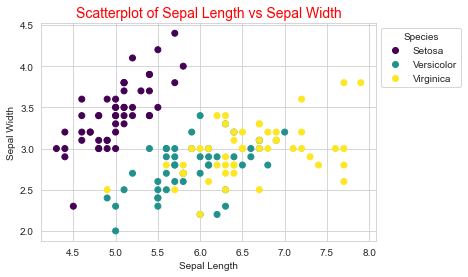

In [16]:
# Using Matplotlib 3 variables
names = ['Setosa','Versicolor','Virginica']
scatter = plt.scatter('sepal_length','sepal_width', data = df, c = df['species'].astype('category').cat.codes, cmap = 'viridis')
plt.title('Scatterplot of Sepal Length vs Sepal Width', size = 14, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles = scatter.legend_elements()[0], labels = names, title = 'Species', bbox_to_anchor = (1,1))
plt.show()

Text(0.5, 0, 'Sepal Length')

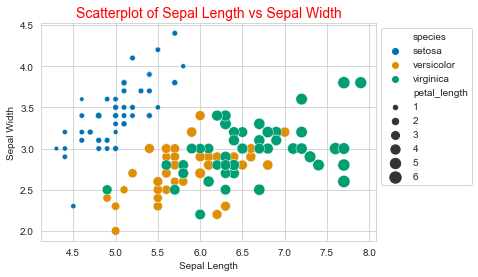

In [17]:
# 4 variables with Seaborn
sns.set_style('whitegrid') #-> inserts a grid in the plot
ax = sns.scatterplot(x = 'sepal_length', y = 'sepal_width',
                     data = df, hue = 'species', size  = 'petal_length',
                     palette = 'colorblind', sizes = (20, 150))
ax.set_title('Scatterplot of Sepal Length vs Sepal Width', size = 14, color = 'r')
ax.legend(loc = 'upper left', bbox_to_anchor = (1,1))
ax.set_ylabel('Sepal Width')
ax.set_xlabel('Sepal Length')

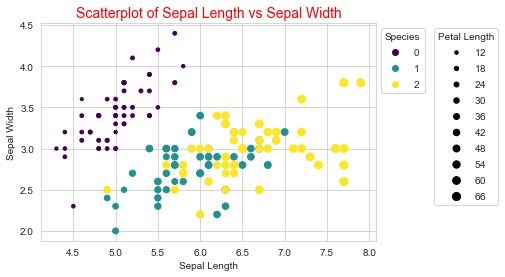

In [18]:
# Using Matplotlib 4 variables
names = ['Setosa','Versicolor','Virginica']
fig, ax = plt.subplots()

scatter = plt.scatter('sepal_length','sepal_width', data = df,
                         c = df['species'].astype('category').cat.codes,
                         s = 10*df['petal_length'], cmap = 'viridis')
#produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(prop = 'colors'),
                         bbox_to_anchor = (1,1), title = 'Species')
ax.add_artist(legend1)

#produce a legend with a cross section of the sizes from the scatter
handles, labels = scatter.legend_elements(prop = 'sizes')
legend2 = ax.legend(handles, labels, bbox_to_anchor = (1.38,1), title = 'Petal Length')

plt.title('Scatterplot of Sepal Length vs Sepal Width', size = 14, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
#plt.legend(handles = scatter.legend_elements()[0], labels = names, title = 'Species', bbox_to_anchor = (1,1))
plt.show()

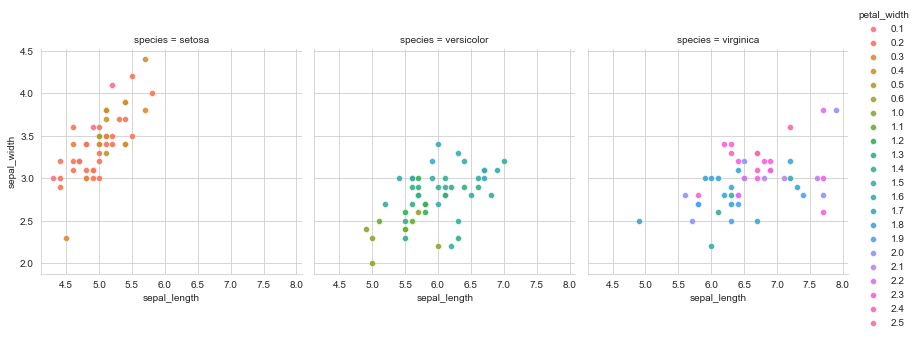

In [19]:
# 4 variables
ax = sns.FacetGrid(data = df, col = 'species', hue = 'petal_width', height = 4)
ax.map(sns.scatterplot, 'sepal_length', 'sepal_width', alpha = 0.9)
ax.add_legend()

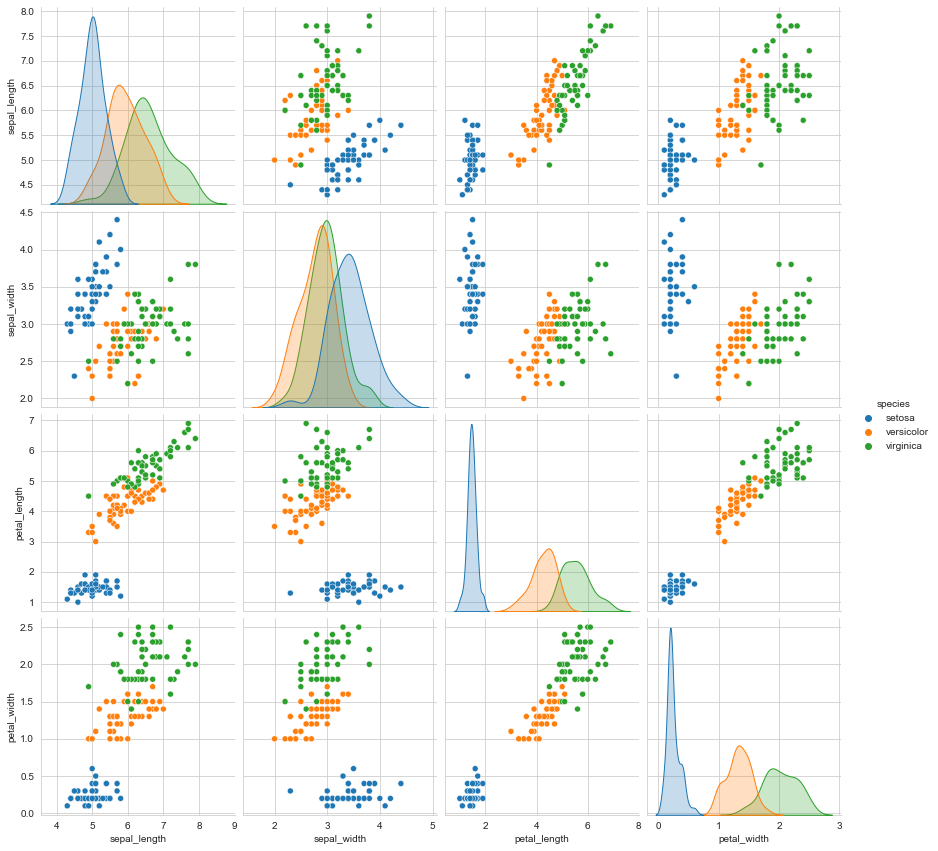

In [20]:
# Matrix
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'species', height =3, diag_kind = 'kde') #hist

# Histograms

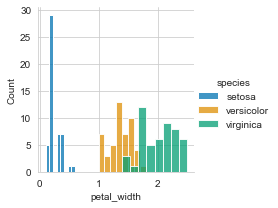

In [21]:
#Histograms using seaborn
sns.set_palette('colorblind') # dark, bright, colorblind
#sns.FacetGrid(df, hue = 'species', height = 4).map(sns.histplot, 'petal_length', bins = 7).add_legend() #bin -> square root of number of values
sns.FacetGrid(df, hue = 'species', height = 3).map(sns.histplot, 'petal_width', bins = 8).add_legend()
#sns.FacetGrid(df, hue = 'species', height = 3).map(sns.distplot, 'sepal_length').add_legend()
#sns.FacetGrid(df, hue = 'species', height = 3).map(sns.distplot, 'sepal_width').add_legend()

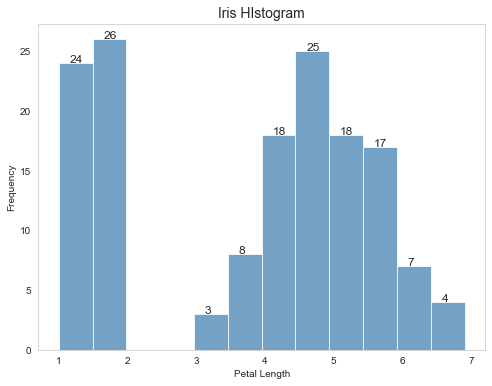

In [22]:
fig, ax = plt.subplots(figsize = (8,6))
density, bins, _ = plt.hist(df['petal_length'], bins = 12, alpha = 0.75, color  = 'steelblue')
count, _ = np.histogram(df['petal_length'], bins)

for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x+0.155, y+0.05, num, fontsize=12) # x,y,str

plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Iris HIstogram', size = 14)
plt.grid(False)
plt.show()

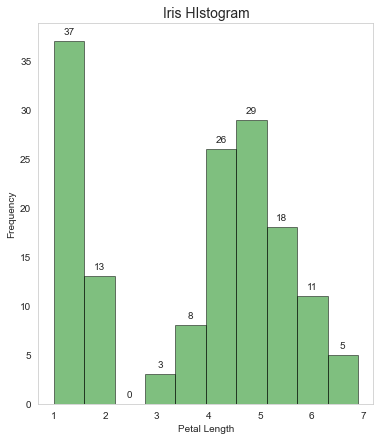

In [23]:
#Histograms using matplotlib
#density = True if you want the probabilty of each bin

fig, ax = plt.subplots(figsize = (6,7))
plt.hist(df['petal_length'], bins = 10, alpha = 0.5, color = 'g', edgecolor = 'k')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Iris HIstogram', size = 14)

plt.grid(False)
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy = (rect.get_x() + rect.get_width()/2, height), xytext = (0,5), textcoords = 'offset points', ha = 'center', va = 'bottom')
plt.show()

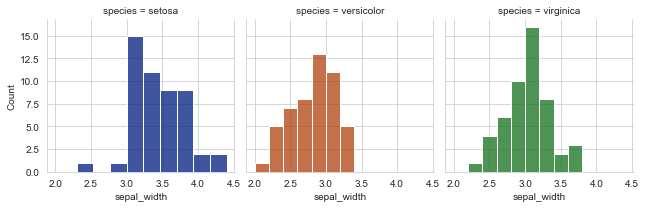

In [24]:
#Several histograms using Seaborn
sns.set_palette('dark')
ax = sns.FacetGrid(data = df, col = 'species', hue = 'species')
ax.map(sns.histplot, 'sepal_width')

(array([34., 14.,  2.,  0.,  7.,  8., 21., 16., 14., 11.,  9., 14.]),
 array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5]),
 <BarContainer object of 12 artists>)

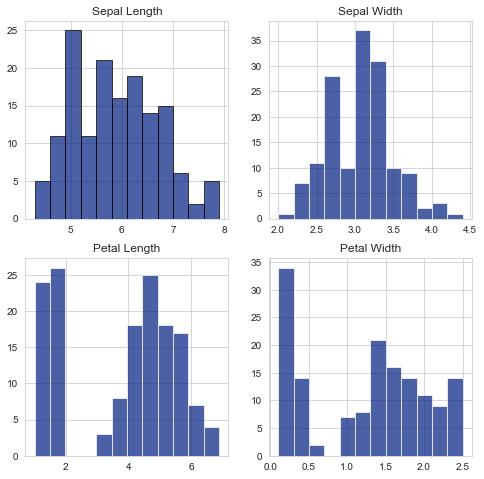

In [25]:
#Several histograms using subplots
fig, axes = plt.subplots(2,2, figsize = (8,8))

axes[0,0].set_title('Sepal Length')
axes[0,0].hist(df['sepal_length'], bins = 12, alpha = 0.7, edgecolor = 'k')

axes[0,1].set_title('Sepal Width')
axes[0,1].hist(df['sepal_width'], bins = 12, alpha = 0.7)

axes[1,0].set_title('Petal Length')
axes[1,0].hist(df['petal_length'], bins = 12, alpha = 0.7)

axes[1,1].set_title('Petal Width')
axes[1,1].hist(df['petal_width'], bins = 12, alpha = 0.7)

(0.0, 2.62)

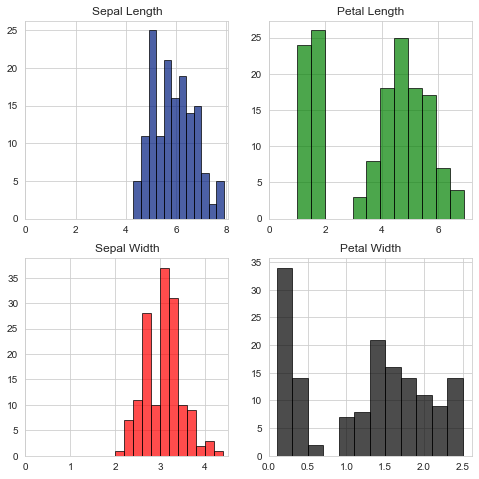

In [26]:
#Several histograms using subplots
fig, axes = plt.subplots(2,2, figsize = (8,8))

axes[0,0].set_title('Sepal Length')
axes[0,0].hist(df['sepal_length'], bins = 12, alpha = 0.7, edgecolor = 'k')
axes[0,0].set_xlim(xmin = 0)

axes[1,0].set_title('Sepal Width')
axes[1,0].hist(df['sepal_width'], bins = 12, alpha = 0.7, edgecolor = 'k', color = 'r')
axes[1,0].set_xlim(xmin = 0)

axes[0,1].set_title('Petal Length')
axes[0,1].hist(df['petal_length'], bins = 12, alpha = 0.7, edgecolor = 'k', color = 'g')
axes[0,1].set_xlim(xmin = 0)

axes[1,1].set_title('Petal Width')
axes[1,1].hist(df['petal_width'], bins = 12, alpha = 0.7, edgecolor = 'k', color  = 'k')
axes[1,1].set_xlim(xmin = 0)

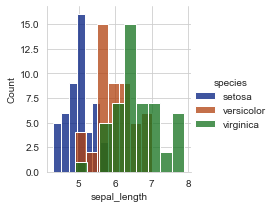

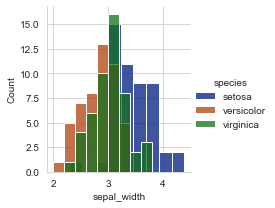

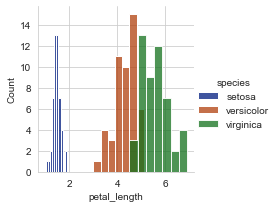

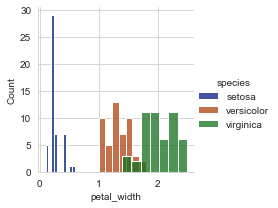

In [27]:
# Same concept but with seaborn
#fig, axes = plt.subplots(2,2,figsize(8,8))
plot = sns. FacetGrid(df, hue = 'species')
plot.map(sns.histplot, 'sepal_length').add_legend()

plot = sns. FacetGrid(df, hue = 'species')
plot.map(sns.histplot, 'sepal_width').add_legend()

plot = sns. FacetGrid(df, hue = 'species')
plot.map(sns.histplot, 'petal_length').add_legend()

plot = sns. FacetGrid(df, hue = 'species')
plot.map(sns.histplot, 'petal_width').add_legend()

plt.show()

Text(0.5, 1.0, 'Sepal Length')

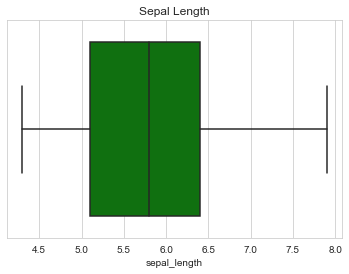

In [28]:
# box plot using seaborn
sns.boxplot(x = df['sepal_length'], color = 'g').set_title('Sepal Length')

Text(0.5, 1.0, 'Sepal Length')

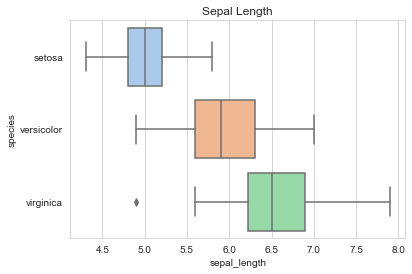

In [29]:
sns.set_palette('pastel')
sns.boxplot(x = df['sepal_length'], y= df['species']).set_title('Sepal Length')
# sns.despine(offset = 10, trim = True) #Quitar ejes
# Diagrama de caha sirve para identificar dato atípico

<AxesSubplot:title={'center':'Sepal Length'}, xlabel='sepal_length', ylabel='species'>

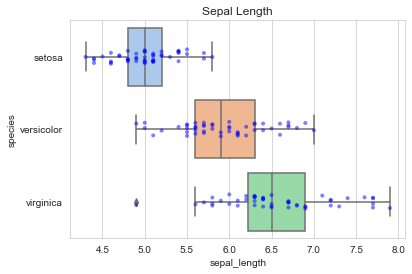

In [30]:
#add each observation
sns.boxplot(x = df['sepal_length'], y= df['species']).set_title('Sepal Length')
sns.stripplot(x = df['sepal_length'], y = df['species'], size = 4, color = 'b', alpha = 0.5)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

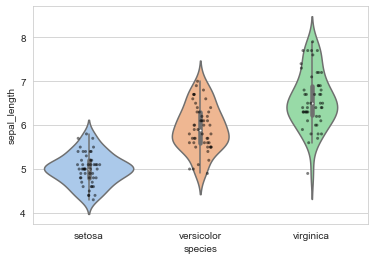

In [31]:
#violin plot
#sns.violinplot(x = df['sepal_length'], y = df['species'], orient = 'h') #horizontal
sns.violinplot( x = df['species'], y = df['sepal_length'])
sns.stripplot( x = df['species'], y = df['sepal_length'], size = 3, color = 'k', alpha = 0.5)
#sns.stripplot(x = df['sepal_length'], y = df['species'], size = 3, color = 'k', alpha = 0.5)